# 실습 1. 
### 수도권 연도별 신규 민간아파트 평균 분양가격 동향
https://www.data.go.kr/data/15061057/fileData.do

#### 1. 라이브러리 import

In [806]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 2. csv 파일 불러오기

In [807]:
df = pd.read_csv('주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20211231.csv', encoding='CP949')
df

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879
...,...,...,...,...,...
6370,제주,모든면적,2021,12,6574
6371,제주,전용면적 60제곱미터이하,2021,12,2862
6372,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,12,6516
6373,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,12,5924


#### 3. 데이터 추출하기

In [808]:
# 결측치 처리
df = df.replace('  ', np.nan)

In [809]:
df = df.dropna(axis=0)
df

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879
...,...,...,...,...,...
6370,제주,모든면적,2021,12,6574
6371,제주,전용면적 60제곱미터이하,2021,12,2862
6372,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,12,6516
6373,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,12,5924


In [810]:
df.dtypes

지역명           object
규모구분          object
연도             int64
월              int64
분양가격(제곱미터)    object
dtype: object

In [811]:
df = df.astype({'분양가격(제곱미터)':'int64'}) # '분양가격(제곱미터)' 자료형 변경: object -> int
df.dtypes

지역명           object
규모구분          object
연도             int64
월              int64
분양가격(제곱미터)     int64
dtype: object

In [812]:
# 서울 평균 분양가격
seoul = df.loc[(df['지역명']=='서울') & (df['규모구분']=='모든면적')]
seoul

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
85,서울,모든면적,2015,11,6050
170,서울,모든면적,2015,12,6041
255,서울,모든면적,2016,1,6108
340,서울,모든면적,2016,2,6111
...,...,...,...,...,...
5950,서울,모든면적,2021,8,9499
6035,서울,모든면적,2021,9,9501
6120,서울,모든면적,2021,10,9662
6205,서울,모든면적,2021,11,9952


In [813]:
s = seoul['분양가격(제곱미터)'].groupby(seoul['연도']).mean().tolist()
s

[5977.333333333333,
 6261.666666666667,
 6492.5,
 6936.166666666667,
 7918.5,
 8154.583333333333,
 9125.833333333334]

In [814]:
# 경기 평균 분양가격
gyeonggi = df.loc[(df['지역명']=='경기') & (df['규모구분']=='모든면적')]
gyeonggi

,지역명,규모구분,연도,월,분양가격(제곱미터)
10,경기,모든면적,2015,10,3138
95,경기,모든면적,2015,11,3098
180,경기,모든면적,2015,12,3198
265,경기,모든면적,2016,1,3198
350,경기,모든면적,2016,2,3219
...,...,...,...,...,...
5960,경기,모든면적,2021,8,4166
6045,경기,모든면적,2021,9,4227
6130,경기,모든면적,2021,10,4202
6215,경기,모든면적,2021,11,4477


In [815]:
g = gyeonggi['분양가격(제곱미터)'].groupby(gyeonggi['연도']).mean().tolist()
g

[3144.6666666666665,
 3400.0,
 3588.0833333333335,
 3995.75,
 4384.5,
 4358.583333333333,
 4297.916666666667]

In [816]:
# 인천
incheon = df.loc[(df['지역명']=='인천') & (df['규모구분']=='모든면적')]
incheon

,지역명,규모구분,연도,월,분양가격(제곱미터)
5,인천,모든면적,2015,10,3163
90,인천,모든면적,2015,11,3184
175,인천,모든면적,2015,12,3184
260,인천,모든면적,2016,1,3191
345,인천,모든면적,2016,2,3192
...,...,...,...,...,...
5955,인천,모든면적,2021,8,4315
6040,인천,모든면적,2021,9,4315
6125,인천,모든면적,2021,10,4316
6210,인천,모든면적,2021,11,4456


In [817]:
i = incheon['분양가격(제곱미터)'].groupby(incheon['연도']).mean().tolist()
i

[3177.0,
 3191.6666666666665,
 3257.4166666666665,
 3416.3333333333335,
 3828.75,
 4446.666666666667,
 4542.916666666667]

In [818]:
year = ['2015', '2016', '2017', '2018', '2019', '2020', '2021']

#### 4. 그래프 그리기

In [819]:
pip install matplotx[all]

Note: you may need to restart the kernel to use updated packages.


In [820]:
import matplotx

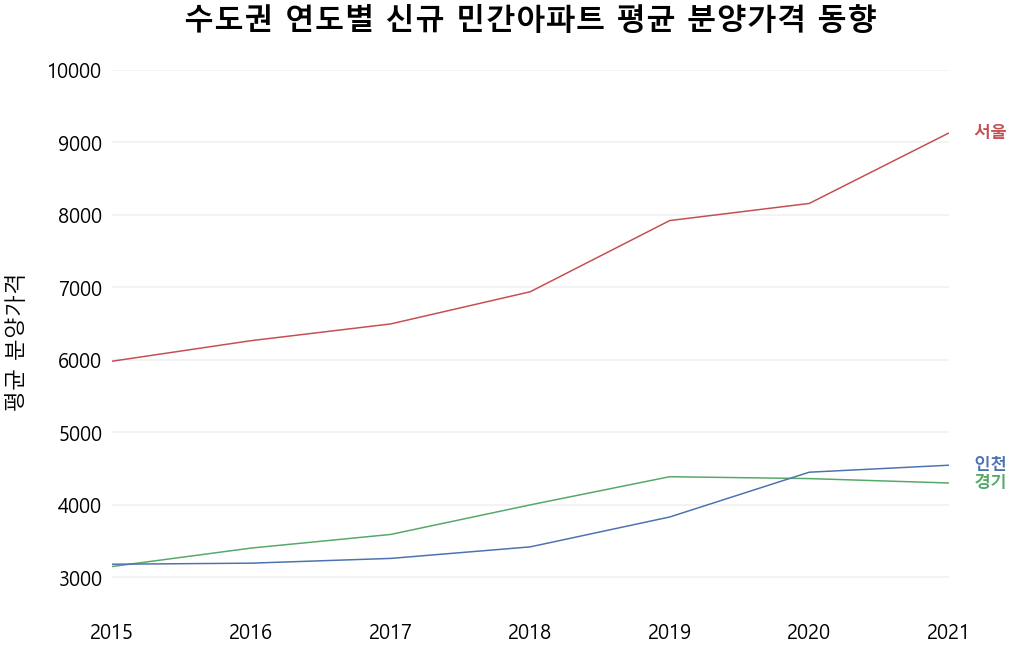

In [824]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rc('font', size=20)

fig = plt.figure(figsize=(15, 10))

#plot
with plt.style.context(matplotx.styles.dufte):
    plt.plot(year, s, color='r', linestyle='solid', label='서울')
    plt.plot(year, g, color='g', linestyle='solid', label='경기')
    plt.plot(year, i, color='b', linestyle='solid', label='인천')
    plt.ylabel('평균 분양가격', fontsize=22, color='black')
    plt.ylim(2500, 10000)
    plt.tick_params(labelcolor='black')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title('수도권 연도별 신규 민간아파트 평균 분양가격 동향', fontweight='bold', fontsize=30, color='black')
    matplotx.line_labels(fontweight='bold', fontsize=17)
    plt.show()

<br>

# 실습 2
### 2000년 ~ 2019년 서울과 강원 인구추이
https://www.data.go.kr/data/15046939/fileData.do

#### 1. 라이브러리 import

In [825]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 2. csv 파일 불러오기

In [826]:
# 강원도
gangwon_df = pd.read_csv('강원도_인구추이 통계_20191231.csv', encoding='CP949')
gangwon_df

,시점,세대수,인구수,남자인구,여자인구,한국인인구,한국인남자,한국인여자,외국인인구,외국인남자,외국인여자,인구증가율,세대당인구,65세이상고령자,인구밀도,면적
0,1961,296732,1585869,791267,794602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.3,NaN,92.3,17184.81
1,1962,295754,1593037,808319,784718,1593037.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,NaN,92.7,17184.81
2,1963,305792,1678126,852652,825474,1678126.0,852652.0,825474.0,0.0,NaN,NaN,5.3,5.5,NaN,101.0,16618.20
3,1964,308605,1722005,878558,843447,1722005.0,878558.0,843447.0,0.0,NaN,NaN,2.6,5.6,NaN,103.6,16618.20
4,1965,312688,1771035,902167,868868,1771035.0,902167.0,868868.0,0.0,0.0,0.0,2.8,5.7,0.0,106.0,16712.20
5,1966,334196,1832383,936824,895559,1832383.0,936824.0,895559.0,0.0,0.0,0.0,3.5,5.5,0.0,109.6,16712.03
6,1967,326508,1825018,930319,894699,1825018.0,930319.0,894699.0,0.0,0.0,0.0,-0.4,5.6,0.0,109.2,16712.03
7,1968,325301,1823612,928804,894808,1823612.0,928804.0,894808.0,0.0,0.0,0.0,-0.1,5.5,0.0,109.1,16712.03
8,1969,328938,1810527,924250,886277,1810527.0,924250.0,886277.0,0.0,0.0,0.0,-0.7,5.3,0.0,108.3,16712.03
9,1970,352484,1866928,953653,913275,1866928.0,953653.0,913275.0,0.0,0.0,0.0,3.1,5.4,0.0,111.7,16712.03


In [827]:
seoul_df = pd.read_csv('인구추이(주민등록인구)_20221126223249.csv')
seoul_df

,구분별(1),구분별(2),구분별(3),1972,1973,1974,1975,1976,1977,1978,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,세대,소계,소계,1182655,1215538,1273678,1409577.00,1461009,1529323,1609121,...,4177970.00,4182351.00,4194176.00,4189948.00,4189839.00,4220082.00,4263868.00,4327605.00,4417954.00,4426007.00
1,인구,소계,소계,6076143,6289556,6541500,6889502.00,7254958,7525629,7823195,...,10442426.00,10388055.00,10369593.00,10297138.00,10204057.00,10124579.00,10049607.00,10010983.00,9911088.00,9736027.00
2,인구,남자,소계,3020029,3095992,3220575,3432182.00,3580754,3725972,3894433,...,5159665.00,5126351.00,5109013.00,5063550.00,5007379.00,4957857.00,4910849.00,4877725.00,4816522.00,4721977.00
3,인구,여자,소계,3056114,3193564,3320925,3457320.00,3674204,3799657,3928762,...,5282761.00,5261704.00,5260580.00,5233588.00,5196678.00,5166722.00,5138758.00,5133258.00,5094566.00,5014050.00
4,인구,한국인,소계,-,-,-,6879464.00,-,-,-,...,10195318.00,10143645.00,10103233.00,10022181.00,9930616.00,9857426.00,9765623.00,9729107.00,9668465.00,9509458.00
5,인구,한국인,남자,-,-,-,3425991.00,-,-,-,...,5041336.00,5007869.00,4979768.00,4930943.00,4876789.00,4830206.00,4773899.00,4744059.00,4701723.00,4618040.00
6,인구,한국인,여자,-,-,-,3453473.00,-,-,-,...,5153982.00,5135776.00,5123465.00,5091238.00,5053827.00,5027220.00,4991724.00,4985048.00,4966742.00,4891418.00
7,인구,외국인,소계,-,-,-,10038.00,-,-,-,...,247108.00,244410.00,266360.00,274957.00,273441.00,267153.00,283984.00,281876.00,242623.00,226569.00
8,인구,외국인,남자,-,-,-,6191.00,-,-,-,...,118329.00,118482.00,129245.00,132607.00,130590.00,127651.00,136950.00,133666.00,114799.00,103937.00
9,인구,외국인,여자,-,-,-,3847.00,-,-,-,...,128779.00,125928.00,137115.00,142350.00,142851.00,139502.00,147034.00,148210.00,127824.00,122632.00


#### 3. 데이터 추출하기

In [828]:
year = np.arange(2000, 2020)
year = year.astype('str')
year

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019'], dtype='<U11')

In [829]:
# 강원도 1972 ~ 2019 인구수 추출
gangwon = gangwon_df.loc[(gangwon_df['시점']>=2000), ['시점', '인구수']]
gangwon.rename(columns={'인구수': '강원'}, inplace=True)
gangwon.index = year
gangwon = gangwon.astype({'강원':'int32'}) # 강원 object -> int 
gangwon

,시점,강원
2000,2000,1559042
2001,2001,1556904
2002,2002,1543665
2003,2003,1533331
2004,2004,1528640
2005,2005,1521099
2006,2006,1515672
2007,2007,1515800
2008,2008,1521467
2009,2009,1525542


In [830]:
# 서울 1972 ~ 2019 인구수 추출
seoul = seoul_df.loc[1:1, '2000':'2019']
seoul = seoul.transpose()
seoul.rename(columns={1: '서울'}, inplace=True)
seoul = seoul.astype({'서울':'int32'}) # 서울 object -> int 
seoul

,서울
2000,10373234
2001,10331244
2002,10280523
2003,10276968
2004,10287847
2005,10297004
2006,10356202
2007,10421782
2008,10456034
2009,10464051


In [831]:
# 서울 + 강원도 - 데이터프레임 합치기
df = pd.concat([seoul, gangwon], axis=1)
df = df.set_index('시점')
df

,서울,강원
시점,,
2000,10373234,1559042
2001,10331244,1556904
2002,10280523,1543665
2003,10276968,1533331
2004,10287847,1528640
2005,10297004,1521099
2006,10356202,1515672
2007,10421782,1515800
2008,10456034,1521467


#### 4. 그래프 그리기

C:\Users\djadp\AppData\Local\Temp\ipykernel_18740\2638431723.py:18: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\djadp\AppData\Local\Temp\ipykernel_18740\2638431723.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



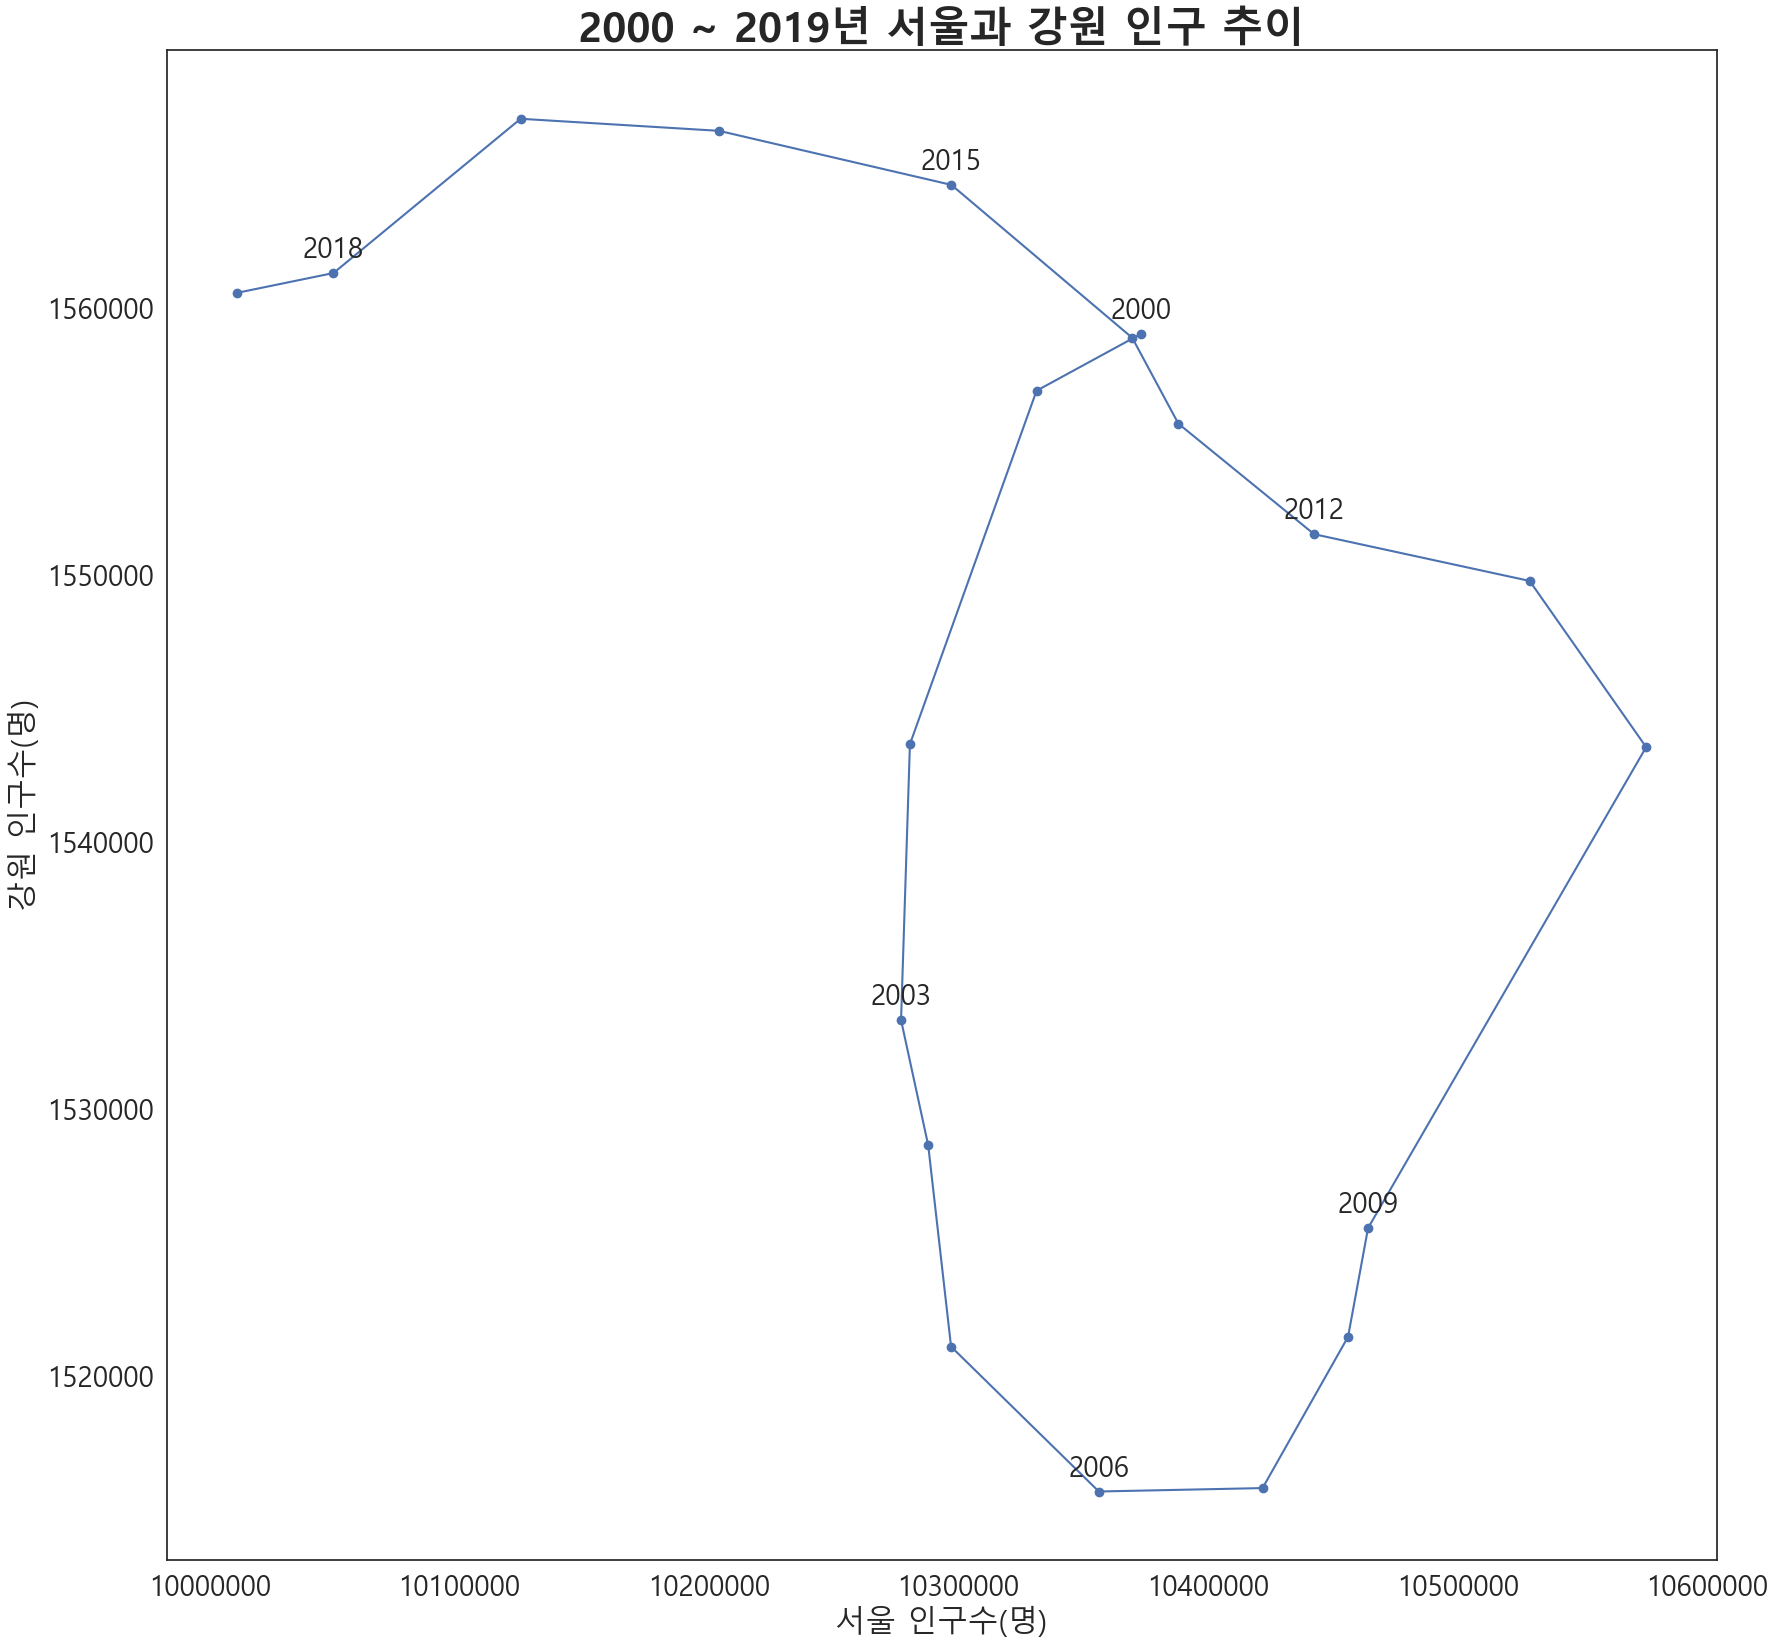

In [842]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rc('font', size=20)

plt.figure(figsize=(20, 20), dpi=100)

plt.plot(df.서울, df.강원, '-', marker='o')

for line in range(0, df.shape[0], 3):
    plt.annotate(
        df.index[line],
        (df.서울.iloc[line], df.강원.iloc[line]+300),
        va='bottom',
        ha='center',
        fontsize=20
    )
    
current_values_y = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values_y])

current_values_x = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values_x])

plt.xlabel('서울 인구수(명)', fontsize=22)
plt.ylabel('강원 인구수(명)', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.title('2000 ~ 2019년 서울과 강원 인구 추이', fontweight='bold', fontsize=30)

plt.show()

<br>

# 실습 3
### 2021년 청운 효자동 월별 평균 기온
https://data.kma.go.kr/data/rmt/rmtList.do?code=400&pgmNo=570#

#### 1. 라이브러리 import

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

#### 2. csv 파일 불러오기

In [327]:
df = pd.read_csv('청운효자동_기온_202101_202112.csv')
df.columns = ['day', 'hour', 'temp']
df

,day,hour,temp
0,1,0.0,-5.2
1,1,100.0,-2.1
2,1,200.0,-1.1
3,1,300.0,-0.3
4,1,400.0,1.3
...,...,...,...
8766,31,1900.0,-9.5
8767,31,2000.0,-9.9
8768,31,2100.0,-10.1
8769,31,2200.0,-10.0


#### 3. 데이터 추출하기

In [332]:
# 1월
df_jan = df.iloc[0:744, :]
df_jan = df_jan.astype({'day': 'int64'})

jan = df_jan.sort_values(by='day', ascending=True).groupby(['day'])['temp'].mean()
jan = jan.to_frame()
jan = jan.reset_index()
jan['month'] = '1월'
mean_temp_jan = jan['temp'].mean()
jan['mean_temp'] = mean_temp_jan
jan

,day,temp,month,mean_temp
0,1,-3.325000,1월,-2.115054
1,2,-5.437500,1월,-2.115054
2,3,-5.287500,1월,-2.115054
3,4,-2.091667,1월,-2.115054
4,5,-7.816667,1월,-2.115054
5,6,-8.408333,1월,-2.115054
6,7,-15.279167,1월,-2.115054
7,8,-14.133333,1월,-2.115054
8,9,-10.937500,1월,-2.115054
9,10,-6.241667,1월,-2.115054


In [333]:
# 2월
df_feb = df.iloc[745:1417, :]
df_feb = df_feb.astype({'day': 'int64'})

feb = df_feb.sort_values(by='day', ascending=True).groupby(['day'])['temp'].mean()
feb = feb.to_frame()
feb = feb.reset_index()
feb['month'] = '2월'
mean_temp_feb = feb['temp'].mean()
feb['mean_temp'] = mean_temp_feb
feb

,day,temp,month,mean_temp
0,1,0.908333,2월,2.775744
1,2,-6.204167,2월,2.775744
2,3,-1.879167,2월,2.775744
3,4,-2.900000,2월,2.775744
4,5,4.254167,2월,2.775744
5,6,6.829167,2월,2.775744
6,7,0.400000,2월,2.775744
7,8,-3.287500,2월,2.775744
8,9,0.858333,2월,2.775744
9,10,4.370833,2월,2.775744


In [334]:
# 3월
df_mar = df.iloc[1418:2162, :]
df_mar = df_mar.astype({'day': 'int64'})

mar = df_mar.sort_values(by='day', ascending=True).groupby(['day'])['temp'].mean()
mar = mar.to_frame()
mar = mar.reset_index()
mar['month'] = '3월'
mean_temp_mar = mar['temp'].mean()
mar['mean_temp'] = mean_temp_mar
mar

,day,temp,month,mean_temp
0,1,2.483333,3월,8.98414
1,2,2.220833,3월,8.98414
2,3,5.554167,3월,8.98414
3,4,7.454167,3월,8.98414
4,5,9.625000,3월,8.98414
5,6,5.437500,3월,8.98414
6,7,6.233333,3월,8.98414
7,8,7.216667,3월,8.98414
8,9,6.562500,3월,8.98414
9,10,9.616667,3월,8.98414


In [335]:
# 4월
df_apr = df.iloc[2163:2882, :]
df_apr = df_apr.astype({'day': 'int64'})

apr = df_apr.sort_values(by='day', ascending=True).groupby(['day'])['temp'].mean()
apr = apr.to_frame()
apr = apr.reset_index()
apr['month'] = '4월'
mean_temp_apr = apr['temp'].mean()
apr['mean_temp'] = mean_temp_apr
apr

,day,temp,month,mean_temp
0,1,17.637500,4월,14.117669
1,2,19.195834,4월,14.117669
2,3,12.391667,4월,14.117669
3,4,10.850000,4월,14.117669
4,5,13.129167,4월,14.117669
5,6,13.587500,4월,14.117669
6,7,13.870833,4월,14.117669
7,8,12.795833,4월,14.117669
8,9,13.487500,4월,14.117669
9,10,12.525000,4월,14.117669


In [336]:
# 5월
df_may = df.iloc[2884:3628, :]
df_may = df_may.astype({'day': 'int64'})

may = df_may.sort_values(by='day', ascending=True).groupby(['day'])['temp'].mean()
may = may.to_frame()
may = may.reset_index()
may['month'] = '5월'
mean_temp_may = may['temp'].mean()
may['mean_temp'] = mean_temp_may
may

,day,temp,month,mean_temp
0,1,9.650000,5월,16.692608
1,2,12.916667,5월,16.692608
2,3,14.929167,5월,16.692608
3,4,13.691667,5월,16.692608
4,5,13.212500,5월,16.692608
5,6,17.379167,5월,16.692608
6,7,12.875000,5월,16.692608
7,8,14.745833,5월,16.692608
8,9,15.966667,5월,16.692608
9,10,12.945833,5월,16.692608


In [337]:
# 6월
df_jun = df.iloc[3629:4349, :]
df_jun = df_jun.astype({'day': 'int64'})

jun = df_jun.sort_values(by='day', ascending=True).groupby(['day'])['temp'].mean()
jun = jun.to_frame()
jun = jun.reset_index()
jun['month'] = '6월'
mean_temp_jun = jun['temp'].mean()
jun['mean_temp'] = mean_temp_jun
jun

,day,temp,month,mean_temp
0,1,20.420833,6월,22.647639
1,2,23.875000,6월,22.647639
2,3,14.204167,6월,22.647639
3,4,19.512500,6월,22.647639
4,5,21.354167,6월,22.647639
5,6,23.170833,6월,22.647639
6,7,20.912500,6월,22.647639
7,8,23.858333,6월,22.647639
8,9,26.683333,6월,22.647639
9,10,23.916667,6월,22.647639


In [338]:
# 7월
df_jul = df.iloc[4350:5094, :]
df_jul = df_jul.astype({'day': 'int64'})

jul = df_jul.sort_values(by='day', ascending=True).groupby(['day'])['temp'].mean()
jul = jul.to_frame()
jul = jul.reset_index()
jul['month'] = '7월'
mean_temp_jul = jul['temp'].mean()
jul['mean_temp'] = mean_temp_jul
jul

,day,temp,month,mean_temp
0,1,26.854167,7월,27.925941
1,2,23.458333,7월,27.925941
2,3,21.854167,7월,27.925941
3,4,21.133333,7월,27.925941
4,5,23.808333,7월,27.925941
5,6,26.095834,7월,27.925941
6,7,26.316667,7월,27.925941
7,8,25.766667,7월,27.925941
8,9,25.408333,7월,27.925941
9,10,26.212500,7월,27.925941


In [339]:
# 8월
df_aug = df.iloc[5095:5839, :]
df_aug = df_aug.astype({'day': 'int64'})

aug = df_aug.sort_values(by='day', ascending=True).groupby(['day'])['temp'].mean()
aug = aug.to_frame()
aug = aug.reset_index()
aug['month'] = '8월'
mean_temp_aug = aug['temp'].mean()
aug['mean_temp'] = mean_temp_aug
aug

,day,temp,month,mean_temp
0,1,26.475000,8월,25.625672
1,2,26.425000,8월,25.625672
2,3,28.537500,8월,25.625672
3,4,28.758334,8월,25.625672
4,5,29.504167,8월,25.625672
5,6,27.183333,8월,25.625672
6,7,28.187500,8월,25.625672
7,8,26.300000,8월,25.625672
8,9,28.612500,8월,25.625672
9,10,23.970833,8월,25.625672


In [340]:
# 9월
df_sep = df.iloc[5840:6560, :]
df_sep = df_sep.astype({'day': 'int64'})

sep = df_sep.sort_values(by='day', ascending=True).groupby(['day'])['temp'].mean()
sep = sep.to_frame()
sep = sep.reset_index()
sep['month'] = '9월'
mean_temp_sep = sep['temp'].mean()
sep['mean_temp'] = mean_temp_sep
sep

,day,temp,month,mean_temp
0,1,22.091667,9월,22.335833
1,2,23.587500,9월,22.335833
2,3,23.691667,9월,22.335833
3,4,23.320833,9월,22.335833
4,5,23.383334,9월,22.335833
5,6,21.070833,9월,22.335833
6,7,20.091666,9월,22.335833
7,8,19.245833,9월,22.335833
8,9,23.750000,9월,22.335833
9,10,23.645833,9월,22.335833


In [341]:
# 10월
df_oct = df.iloc[6561:7305, :]
df_oct = df_oct.astype({'day': 'int64'})

oct = df_oct.sort_values(by='day', ascending=True).groupby(['day'])['temp'].mean()
oct = oct.to_frame()
oct = oct.reset_index()
oct['month'] = '10월'
mean_temp_oct = oct['temp'].mean()
oct['mean_temp'] = mean_temp_oct
oct

,day,temp,month,mean_temp
0,1,20.691667,10월,15.37621
1,2,21.070833,10월,15.37621
2,3,22.912500,10월,15.37621
3,4,20.866667,10월,15.37621
4,5,22.162500,10월,15.37621
5,6,18.675000,10월,15.37621
6,7,19.058334,10월,15.37621
7,8,19.137500,10월,15.37621
8,9,21.641667,10월,15.37621
9,10,17.016667,10월,15.37621


In [342]:
# 11월
df_nov = df.iloc[7306:8026, :]
df_nov = df_nov.astype({'day': 'int64'})

nov = df_nov.sort_values(by='day', ascending=True).groupby(['day'])['temp'].mean()
nov = nov.to_frame()
nov = nov.reset_index()
nov['month'] = '11월'
mean_temp_nov = nov['temp'].mean()
nov['mean_temp'] = mean_temp_nov
nov

,day,temp,month,mean_temp
0,1,11.850000,11월,7.951667
1,2,11.533333,11월,7.951667
2,3,12.483333,11월,7.951667
3,4,11.741667,11월,7.951667
4,5,13.300000,11월,7.951667
5,6,14.462500,11월,7.951667
6,7,16.445833,11월,7.951667
7,8,5.025000,11월,7.951667
8,9,4.095833,11월,7.951667
9,10,4.725000,11월,7.951667


In [343]:
# 12월
df_dec = df.iloc[8027:8771, :]
df_dec = df_dec.astype({'day': 'int64'})

dec = df_dec.sort_values(by='day', ascending=True).groupby(['day'])['temp'].mean()
dec = dec.to_frame()
dec = dec.reset_index()
dec['month'] = '12월'
mean_temp_dec = dec['temp'].mean()
dec['mean_temp'] = mean_temp_dec
dec

,day,temp,month,mean_temp
0,1,-1.850000,12월,0.552285
1,2,3.587500,12월,0.552285
2,3,0.191667,12월,0.552285
3,4,1.612500,12월,0.552285
4,5,3.633333,12월,0.552285
5,6,6.641667,12월,0.552285
6,7,6.737500,12월,0.552285
7,8,6.950000,12월,0.552285
8,9,7.612500,12월,0.552285
9,10,6.300000,12월,0.552285


In [344]:
# 데이터프레임 합치기
df = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec])
df

,day,temp,month,mean_temp
0,1,-3.325000,1월,-2.115054
1,2,-5.437500,1월,-2.115054
2,3,-5.287500,1월,-2.115054
3,4,-2.091667,1월,-2.115054
4,5,-7.816667,1월,-2.115054
...,...,...,...,...
26,27,-5.908333,12월,0.552285
27,28,-2.062500,12월,0.552285
28,29,-0.683333,12월,0.552285
29,30,-4.429167,12월,0.552285


In [345]:
month_dict = {
    1: '1월',
    2: '2월',
    3: '3월',
    4: '4월',
    5: '5월',
    6: '6월',
    7: '7월',
    8: '8월',
    9: '9월',
    10: '10월',
    11: '11월',
    12: '12월',
}

#### 4. 그래프 그리기

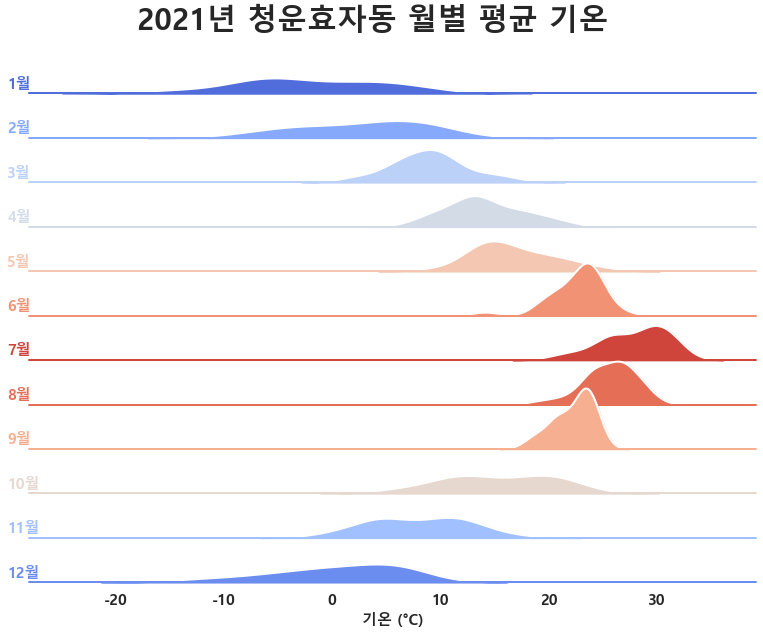

In [354]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', size=20)

# 팔레트 설정
pal = sns.color_palette(palette='coolwarm', n_colors=12)

g = sns.FacetGrid(df, row='month', hue='mean_temp', aspect=15, height=0.75, palette=pal)

# 밀도 추정
g.map(sns.kdeplot, 'temp', bw_adjust=1, clip_on=False, fill=True, alpha=1, linewidth=1.5)

# 경계선 추가
g.map(sns.kdeplot, 'temp', bw_adjust=1, clip_on=False, color='w', lw=2)

# 월별 수평선 추가
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# 월 추가
for i, ax in enumerate(g.axes.flat):
    ax.text(-30, 0.02, month_dict[i+1], fontweight='bold', fontsize=15, color=ax.lines[-1].get_color())
    
g.fig.subplots_adjust(hspace=-0.3)

g.set_titles("")
g.set(yticks=[])
g.set(ylabel=None)
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('기온 (°C)', fontweight='bold', fontsize=15)
g.fig.suptitle('2021년 청운효자동 월별 평균 기온',
               ha='center',
               fontsize=30,
               fontweight='bold')

plt.show()

<br>

# 실습 4
### 여성 공군 장병의 키별 다리길이 비교
https://www.data.go.kr/data/15090359/fileData.do

#### 1. 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. csv 파일 불러오기

In [2]:
df = pd.read_csv('국방부_공군 신체측정정보(여)_20210928.csv', encoding='CP949')
df

,키,몸무게,머리둘레,목둘레,화장,젖가슴둘레,배꼽수준허리둘레,엉덩이둘레,샅높이,희망치수신발,...,(초)정모,(초)동운동복,(초)춘추운동복,(초)하운동복상의,(초)하운동복하의,(초)동내의,(초)춘추내의,(초)티셔츠(런닝),(초)삼각팬티,(초)사각팬티
0,163.4,48.9,55.4,33.6,61.3,85.0,73.7,91.0,76.0,230,...,56호,95,95,95,95,95,95,90,90,90
1,158.1,60.2,56.0,36.4,86.8,95.5,77.5,97.0,69.5,235,...,57호,95,95,95,95,95,95,95,95,95
2,165.9,54.9,52.4,34.7,81.0,83.6,68.2,92.3,78.0,250,...,53호,95,95,95,95,95,95,90,90,90
3,169.7,52.6,54.5,34.3,81.3,82.3,70.9,94.2,79.0,245,...,55호,95,95,95,95,95,95,90,95,95
4,171.8,72.4,57.7,37.5,74.9,100.4,85.5,99.8,79.0,240,...,58호,100,100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,169.3,51.0,53.1,34.1,73.2,80.0,71.5,87.9,80.5,0,...,54호,95,95,95,95,95,95,90,90,90
310,159.7,48.5,52.0,33.5,70.7,73.8,69.9,91.1,73.5,240,...,53호,95,95,95,95,95,95,90,90,90
311,166.8,52.9,53.2,34.4,76.7,80.6,71.6,92.7,76.5,240,...,54호,95,95,95,95,95,95,90,95,95
312,165.8,50.5,54.7,33.8,64.8,78.0,70.7,91.7,76.5,240,...,55호,95,95,95,95,95,95,90,90,90


#### 3. 그래프 그리기

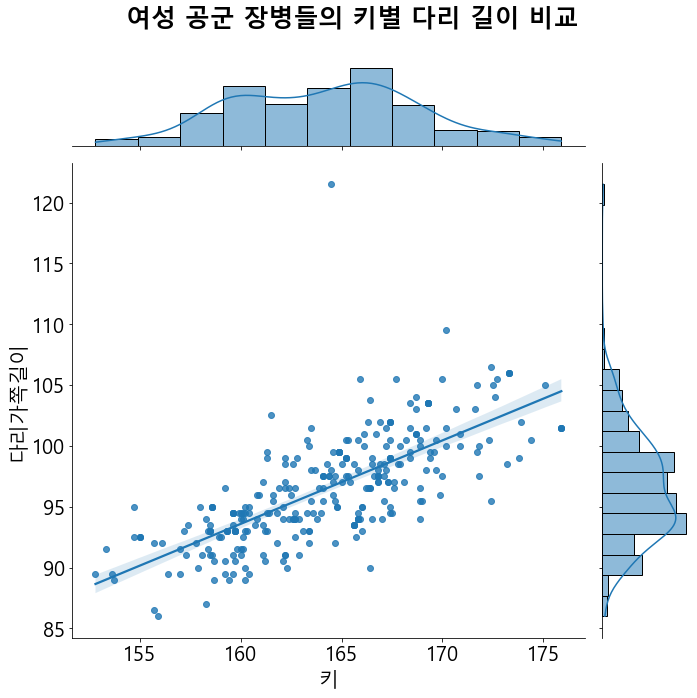

In [3]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rc('font', size=20)

r = sns.jointplot(x=df['키'], y=df['다리가쪽길이'], kind='reg', height=10)
r.fig.suptitle('여성 공군 장병들의 키별 다리 길이 비교', fontweight='bold', fontsize=25)
r.fig.subplots_adjust(top=0.9)

plt.show()

# 실습 5
### 공군 장병의 키별 발사이즈 크기 비교
https://www.data.go.kr/data/15090354/fileData.do<br>
https://www.data.go.kr/data/15090359/fileData.do

#### 1. 라이브러리 import

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. csv 파일 불러오기

In [45]:
df_f = pd.read_csv('국방부_공군 신체측정정보(여)_20210928.csv', encoding='CP949')
df_f

,키,몸무게,머리둘레,목둘레,화장,젖가슴둘레,배꼽수준허리둘레,엉덩이둘레,샅높이,희망치수신발,...,(초)정모,(초)동운동복,(초)춘추운동복,(초)하운동복상의,(초)하운동복하의,(초)동내의,(초)춘추내의,(초)티셔츠(런닝),(초)삼각팬티,(초)사각팬티
0,163.4,48.9,55.4,33.6,61.3,85.0,73.7,91.0,76.0,230,...,56호,95,95,95,95,95,95,90,90,90
1,158.1,60.2,56.0,36.4,86.8,95.5,77.5,97.0,69.5,235,...,57호,95,95,95,95,95,95,95,95,95
2,165.9,54.9,52.4,34.7,81.0,83.6,68.2,92.3,78.0,250,...,53호,95,95,95,95,95,95,90,90,90
3,169.7,52.6,54.5,34.3,81.3,82.3,70.9,94.2,79.0,245,...,55호,95,95,95,95,95,95,90,95,95
4,171.8,72.4,57.7,37.5,74.9,100.4,85.5,99.8,79.0,240,...,58호,100,100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,169.3,51.0,53.1,34.1,73.2,80.0,71.5,87.9,80.5,0,...,54호,95,95,95,95,95,95,90,90,90
310,159.7,48.5,52.0,33.5,70.7,73.8,69.9,91.1,73.5,240,...,53호,95,95,95,95,95,95,90,90,90
311,166.8,52.9,53.2,34.4,76.7,80.6,71.6,92.7,76.5,240,...,54호,95,95,95,95,95,95,90,95,95
312,165.8,50.5,54.7,33.8,64.8,78.0,70.7,91.7,76.5,240,...,55호,95,95,95,95,95,95,90,90,90


In [46]:
df_m = pd.read_csv('국방부_공군 신체측정정보(남)_20210928.csv', encoding='CP949')
df_m

,성별,측정일자,키,몸무게,머리둘레,희망치수머리,목둘레,화장,젖가슴둘레,배꼽수준허리둘레,...,희망치수신발,몸무게(오른쪽),몸무게(왼쪽),윗가슴둘레(겨드랑이),허리둘레(윗허리),어깨가쪽사이길이,팔길이,등길이,다리가쪽길이,총장
0,남,2021-06-16,169.2,55.6,54.1,0,34.7,60.3,86.4,67.5,...,260.0,NaN,NaN,86.8,70.8,40.5,39.4,32.5,99.5,142.0
1,남,2021-06-16,182.7,66.6,55.8,0,36.3,87.5,90.6,75.7,...,280.0,NaN,NaN,95.9,75.2,54.9,61.9,37.5,106.0,153.5
2,남,2021-06-16,177.7,79.7,58.5,0,38.3,77.0,98.6,85.2,...,270.0,NaN,NaN,104.7,85.8,57.4,50.6,38.0,102.0,150.0
3,남,2021-06-16,171.3,69.4,56.3,0,37.0,77.0,93.9,78.5,...,270.0,NaN,NaN,94.7,80.5,54.2,50.9,35.5,99.0,144.5
4,남,2021-06-16,173.8,63.9,55.5,0,36.1,62.3,89.9,74.2,...,265.0,NaN,NaN,89.6,75.0,47.5,39.6,28.5,108.0,146.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,남,2021-03-04,168.8,65.0,57.3,0,36.7,77.4,84.1,77.2,...,265.0,NaN,NaN,92.3,0.0,52.6,56.1,42.5,43.8,146.3
651,남,2021-03-04,172.2,90.8,57.9,0,40.1,89.3,105.8,92.1,...,280.0,NaN,NaN,115.2,95.6,61.2,63.2,38.5,98.5,147.0
652,남,2021-03-04,179.8,70.6,59.2,0,36.8,89.9,93.3,78.7,...,285.0,NaN,NaN,107.6,78.0,59.1,60.0,33.5,106.0,149.5
653,남,2021-03-04,175.6,65.0,59.1,0,39.8,78.0,92.3,86.3,...,270.0,NaN,NaN,99.4,0.0,56.0,55.2,45.2,46.7,153.3


#### 3. 데이터 추출하기

In [47]:
# 남성 데이터 추출하기
male = df_m[['키', '희망치수신발']]
male

,키,희망치수신발
0,169.2,260.0
1,182.7,280.0
2,177.7,270.0
3,171.3,270.0
4,173.8,265.0
...,...,...
650,168.8,265.0
651,172.2,280.0
652,179.8,285.0
653,175.6,270.0


In [48]:
# 남성 - 공백, 0 등 결측치 제거
male.replace('', np.nan, inplace=True)
male.replace(0, np.nan, inplace=True)
male = male.dropna(axis=0)
male

C:\Users\djadp\AppData\Local\Temp\ipykernel_18740\3039746384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male.replace('', np.nan, inplace=True)
C:\Users\djadp\AppData\Local\Temp\ipykernel_18740\3039746384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male.replace(0, np.nan, inplace=True)


,키,희망치수신발
0,169.2,260.0
1,182.7,280.0
2,177.7,270.0
3,171.3,270.0
4,173.8,265.0
...,...,...
650,168.8,265.0
651,172.2,280.0
652,179.8,285.0
653,175.6,270.0


In [49]:
male = male.astype({'희망치수신발':'int64'}) # 남성 - 희망치수신발 자료형 변경: object -> int
male.dtypes

키         float64
희망치수신발      int64
dtype: object

In [50]:
# 여성 데이터 추출하기
female = df_f[['키', '희망치수신발']]
female

,키,희망치수신발
0,163.4,230
1,158.1,235
2,165.9,250
3,169.7,245
4,171.8,240
...,...,...
309,169.3,0
310,159.7,240
311,166.8,240
312,165.8,240


In [51]:
# 여성 - 0 등 결측치 제거
female.replace(0, np.nan, inplace=True)
female = female.dropna(axis=0)
female

C:\Users\djadp\AppData\Local\Temp\ipykernel_18740\1771286756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female.replace(0, np.nan, inplace=True)


,키,희망치수신발
0,163.4,230.0
1,158.1,235.0
2,165.9,250.0
3,169.7,245.0
4,171.8,240.0
...,...,...
308,164.9,250.0
310,159.7,240.0
311,166.8,240.0
312,165.8,240.0


In [52]:
female = female.astype({'희망치수신발':'int64'}) # 여성 - 희망치수신발 자료형 변경: object -> int
female.dtypes

키         float64
희망치수신발      int64
dtype: object

#### 4. 그래프 그리기

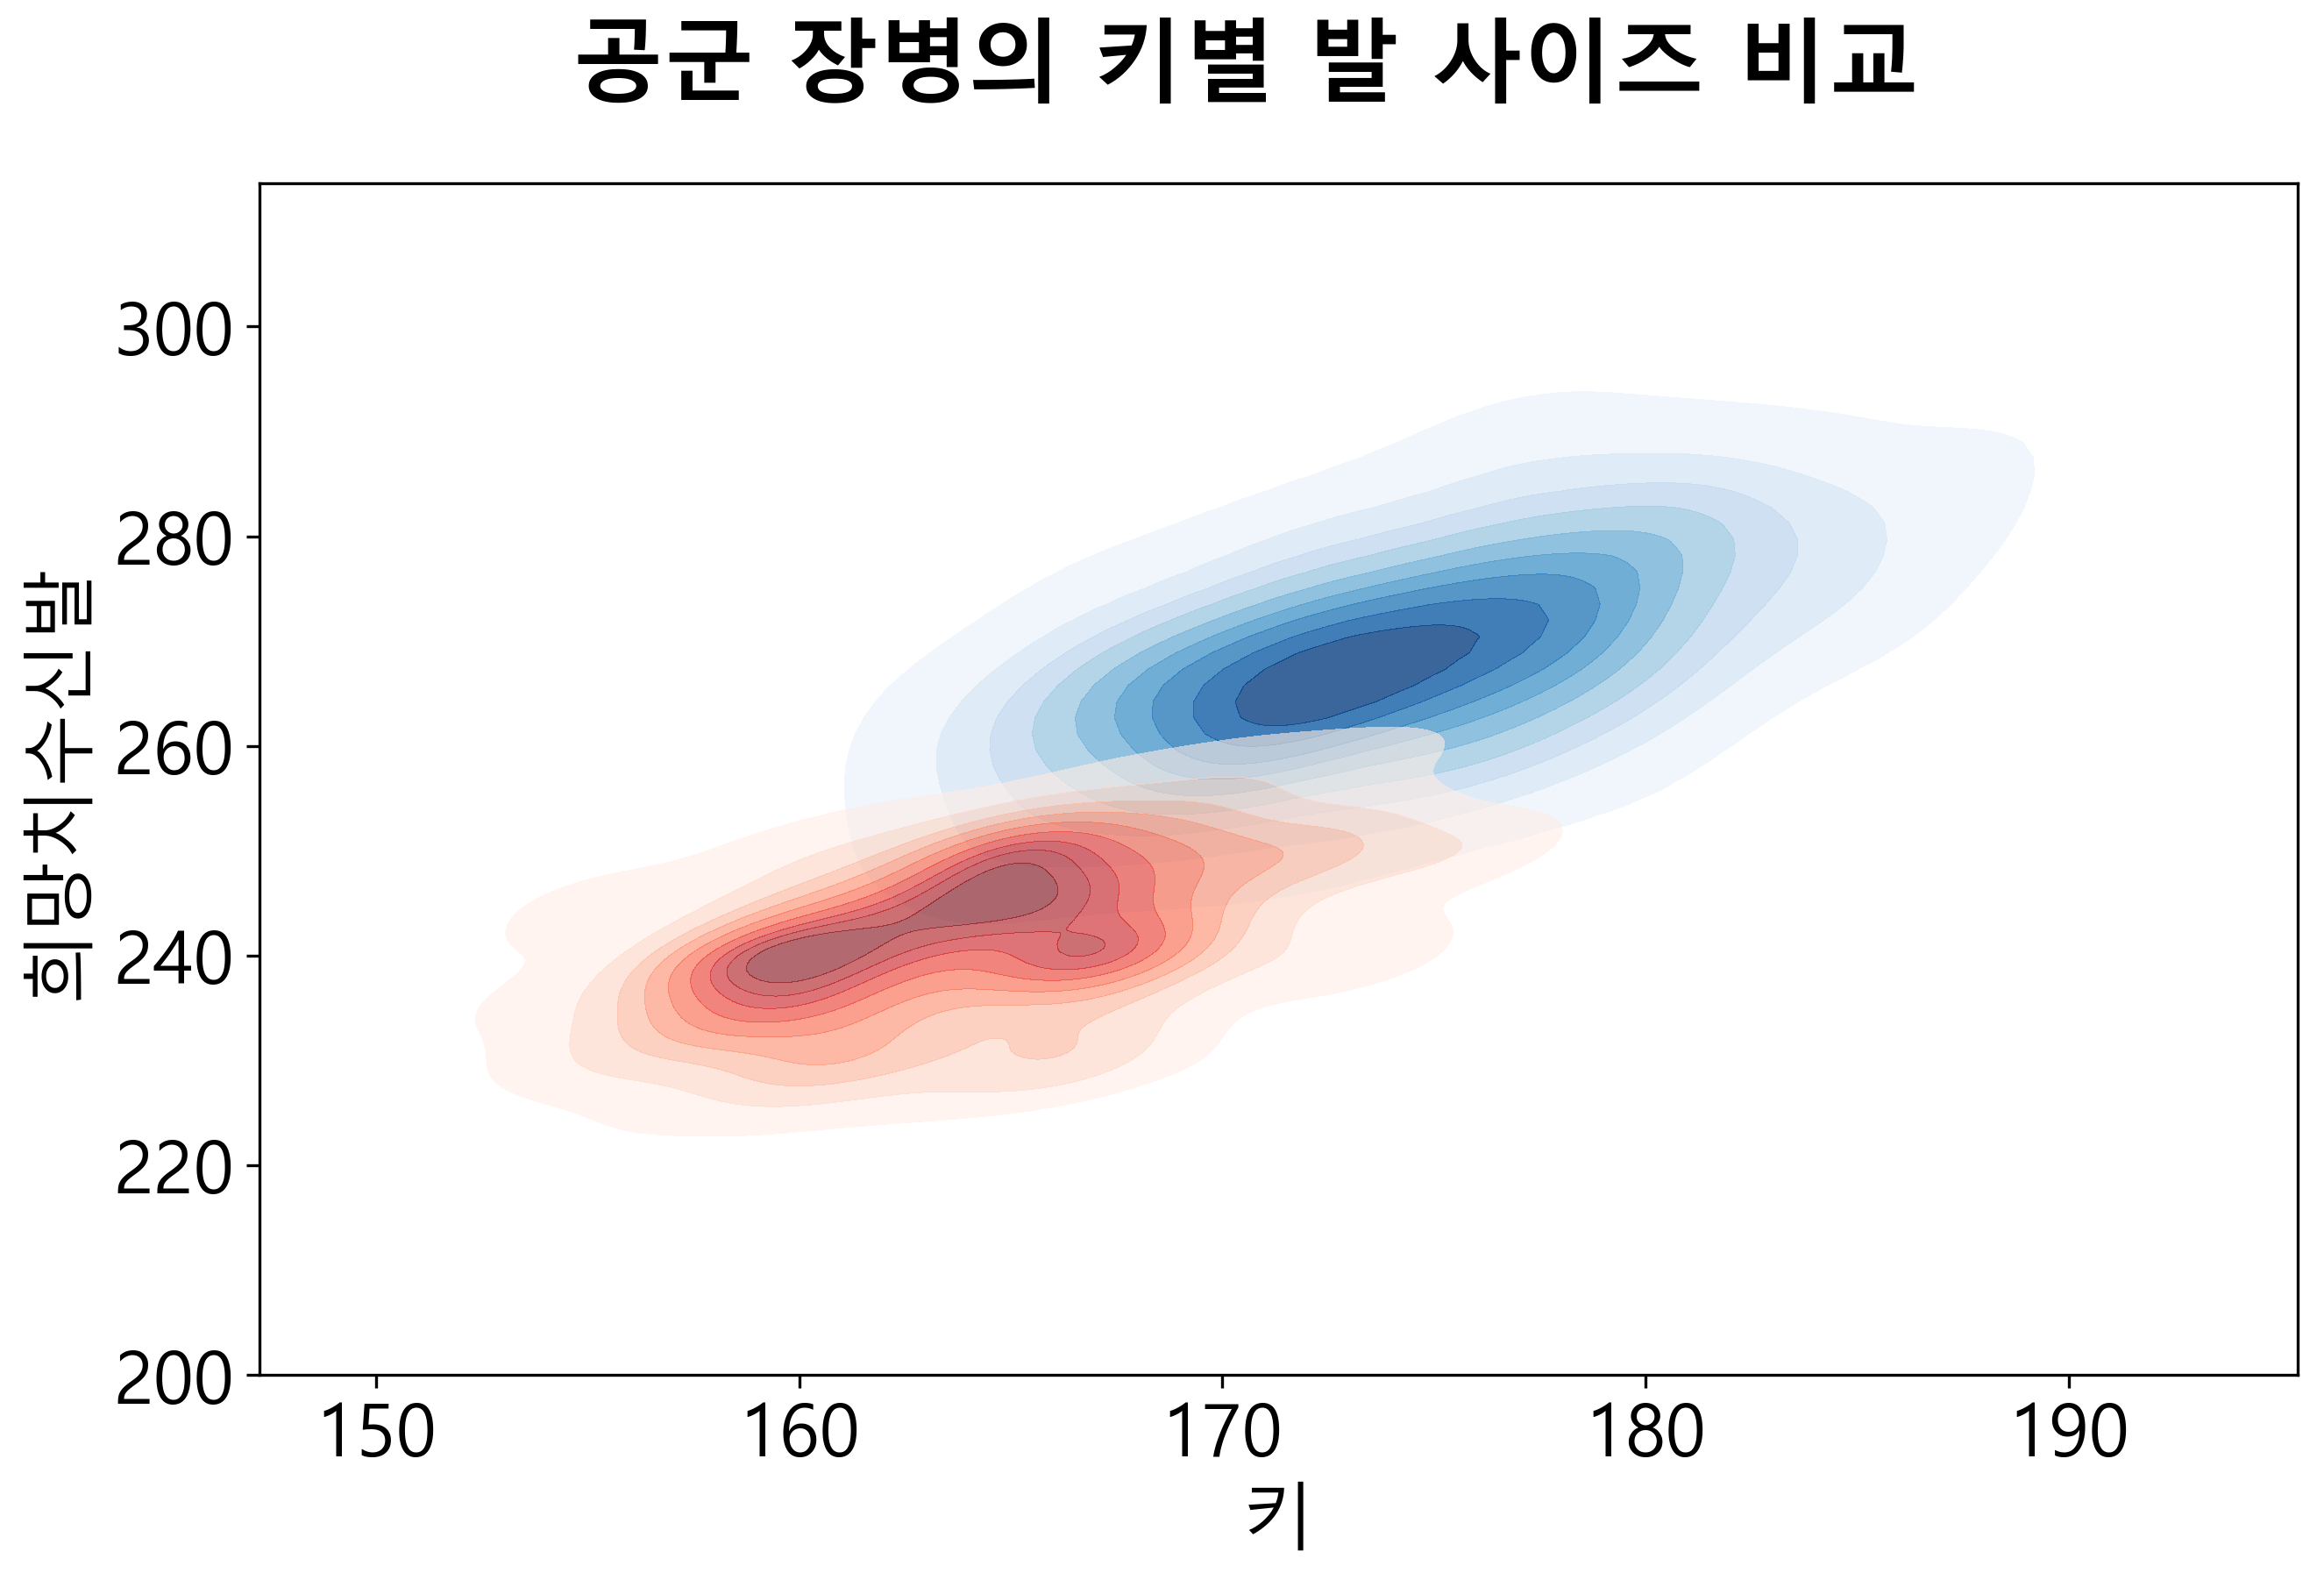

In [86]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

ax = sns.kdeplot(x=male.키, y=male.희망치수신발, cmap='Blues', shade=True, alpha=0.8)
ax = sns.kdeplot(x=female.키, y=female.희망치수신발, cmap='Reds', shade=True, alpha=0.6)
ax.set_ylim(200,)
fig.suptitle('공군 장병의 키별 발 사이즈 비교', fontweight='bold', fontsize=25)

plt.show()

<br>

# 실습 6
### 2022년 5월 서울특별시 공공자전거 요일별 이용현황
http://data.seoul.go.kr/dataList/OA-15246/F/1/datasetView.do

#### 1. 라이브러리 import

In [792]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 2. csv 파일 불러오기

In [793]:
df = pd.read_csv('서울특별시 공공자전거 이용정보(일별)_22.05.csv', encoding='CP949')
df

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-05-01,3,중랑센터,정기권,M,40대,1,151.98,1.17,5050.00,27
1,2022-05-01,102,102. 망원역 1번출구 앞,단체권,NaN,20대,3,91.76,0.94,4064.94,43
2,2022-05-01,102,102. 망원역 1번출구 앞,단체권,NaN,40대,1,77.87,0.86,3710.00,38
3,2022-05-01,102,102. 망원역 1번출구 앞,단체권,F,20대,2,162.88,1.94,8394.12,58
4,2022-05-01,102,102. 망원역 1번출구 앞,일일권(비회원),NaN,기타,2,193.78,1.75,7528.39,52
...,...,...,...,...,...,...,...,...,...,...,...
1048570,2022-05-20,2177,2177. 신대방역 2번 출구,정기권,F,기타,14,772.76,7.70,33162.42,297
1048571,2022-05-20,2177,2177. 신대방역 2번 출구,정기권,M,10대,5,179.81,1.64,7081.56,72
1048572,2022-05-20,2177,2177. 신대방역 2번 출구,정기권,M,20대,27,1062.39,8.98,38727.09,376
1048573,2022-05-20,2177,2177. 신대방역 2번 출구,정기권,M,30대,27,2760.41,19.50,84136.73,532


#### 3. 데이터 추출하기

In [794]:
# 결측치 제거
df = df.dropna(axis=0)
df

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-05-01,3,중랑센터,정기권,M,40대,1,151.98,1.17,5050.00,27
3,2022-05-01,102,102. 망원역 1번출구 앞,단체권,F,20대,2,162.88,1.94,8394.12,58
8,2022-05-01,102,102. 망원역 1번출구 앞,일일권,F,20대,6,779.41,7.03,30280.16,268
9,2022-05-01,102,102. 망원역 1번출구 앞,일일권,F,30대,6,195.87,2.03,8767.45,135
10,2022-05-01,102,102. 망원역 1번출구 앞,일일권,F,40대,3,337.70,3.05,13119.58,159
...,...,...,...,...,...,...,...,...,...,...,...
1048570,2022-05-20,2177,2177. 신대방역 2번 출구,정기권,F,기타,14,772.76,7.70,33162.42,297
1048571,2022-05-20,2177,2177. 신대방역 2번 출구,정기권,M,10대,5,179.81,1.64,7081.56,72
1048572,2022-05-20,2177,2177. 신대방역 2번 출구,정기권,M,20대,27,1062.39,8.98,38727.09,376
1048573,2022-05-20,2177,2177. 신대방역 2번 출구,정기권,M,30대,27,2760.41,19.50,84136.73,532


In [795]:
# 성별 M, F, m, F => 대문자 통일
df['성별'] = df['성별'].str.upper()

C:\Users\djadp\AppData\Local\Temp\ipykernel_18740\1720683793.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [796]:
# 연령대코드
df = df[df['연령대코드'] != '기타']
df['연령대코드'] = df['연령대코드'].str[:2]
df = df.astype({'연령대코드':'int64'})
df.dtypes

C:\Users\djadp\AppData\Local\Temp\ipykernel_18740\2070784706.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



대여일자        object
대여소번호        int64
대여소         object
대여구분코드      object
성별          object
연령대코드        int64
이용건수         int64
운동량        float64
탄소량        float64
이동거리(M)    float64
이용시간(분)      int64
dtype: object

In [797]:
# 일요일 데이터 추출하기
sun = df[(df['대여일자'].str.contains('-01')) | (df['대여일자'].str.contains('-08')) | (df['대여일자'].str.contains('-15')) | (df['대여일자'].str.contains('-22')) | (df['대여일자'].str.contains('-29'))]
sun = sun[['대여일자', '성별', '연령대코드']]
sun.rename(columns={'대여일자':'대여요일'}, inplace=True)
sun['대여요일'] = '일요일'
sun = sun.sample(n=3000)
sun

,대여요일,성별,연령대코드
415797,일요일,M,30
392854,일요일,M,40
397953,일요일,F,30
4329,일요일,M,30
798071,일요일,F,40
...,...,...,...
388246,일요일,M,30
378363,일요일,M,30
766180,일요일,M,10
391078,일요일,M,20


In [798]:
# 월요일 
mon = df[(df['대여일자'].str.contains('-02')) | (df['대여일자'].str.contains('-09')) | (df['대여일자'].str.contains('-16')) | (df['대여일자'].str.contains('-23')) | (df['대여일자'].str.contains('-30'))]
mon = mon[['대여일자', '성별', '연령대코드']]
mon.rename(columns={'대여일자':'대여요일'}, inplace=True)
mon['대여요일'] = '월요일'
mon = mon.sample(n=3000)
mon

,대여요일,성별,연령대코드
817018,월요일,F,30
459776,월요일,F,20
62644,월요일,F,40
91380,월요일,F,20
449377,월요일,F,30
...,...,...,...
91988,월요일,M,50
814533,월요일,M,40
431092,월요일,F,10
442971,월요일,F,20


In [799]:
# 화요일 
tue = df[(df['대여일자'].str.contains('-03')) | (df['대여일자'].str.contains('-10')) | (df['대여일자'].str.contains('-17')) | (df['대여일자'].str.contains('-24')) | (df['대여일자'].str.contains('-31'))]
tue = tue[['대여일자', '성별', '연령대코드']]
tue.rename(columns={'대여일자':'대여요일'}, inplace=True)
tue['대여요일'] = '화요일'
tue = tue.sample(n=3000)
tue

,대여요일,성별,연령대코드
888279,화요일,F,20
894796,화요일,F,40
524268,화요일,F,30
898295,화요일,M,30
903726,화요일,F,50
...,...,...,...
522955,화요일,M,40
498689,화요일,M,40
132828,화요일,M,40
890736,화요일,F,20


In [800]:
# 수요일 
wen = df[(df['대여일자'].str.contains('04')) | (df['대여일자'].str.contains('11')) | (df['대여일자'].str.contains('18')) | (df['대여일자'].str.contains('25'))]
wen = wen[['대여일자', '성별', '연령대코드']]
wen.rename(columns={'대여일자':'대여요일'}, inplace=True)
wen['대여요일'] = '수요일'
wen = wen.sample(n=3000)
wen

,대여요일,성별,연령대코드
537140,수요일,M,20
919109,수요일,M,30
954530,수요일,M,50
572167,수요일,M,30
917926,수요일,F,20
...,...,...,...
532389,수요일,F,40
210163,수요일,F,30
209288,수요일,M,20
942963,수요일,M,40


In [801]:
# 목요일
thr = df[(df['대여일자'].str.contains('2022-05-05')) | (df['대여일자'].str.contains('-12')) | (df['대여일자'].str.contains('-19')) | (df['대여일자'].str.contains('-26'))]
thr = thr[['대여일자', '성별', '연령대코드']]
thr.rename(columns={'대여일자':'대여요일'}, inplace=True)
thr['대여요일'] = '목요일'
thr = thr.sample(n=3000)
thr

,대여요일,성별,연령대코드
617070,목요일,M,70
247993,목요일,M,40
1004564,목요일,F,50
613307,목요일,M,50
221850,목요일,F,20
...,...,...,...
239337,목요일,M,20
620623,목요일,F,20
242906,목요일,F,30
624850,목요일,F,20


In [802]:
# 금요일 
fri = df[(df['대여일자'].str.contains('-06')) | (df['대여일자'].str.contains('-13')) | (df['대여일자'].str.contains('-20')) | (df['대여일자'].str.contains('-27'))]
fri = fri[['대여일자', '성별', '연령대코드']]
fri.rename(columns={'대여일자':'대여요일'}, inplace=True)
fri['대여요일'] = '금요일'
fri = fri.sample(n=3000)
fri

,대여요일,성별,연령대코드
652423,금요일,F,30
322257,금요일,M,10
1047930,금요일,M,20
1033342,금요일,M,30
1042422,금요일,F,50
...,...,...,...
641098,금요일,M,10
670831,금요일,M,50
674098,금요일,M,20
639965,금요일,F,20


In [803]:
# 토요일
sat = df[(df['대여일자'].str.contains('-07')) | (df['대여일자'].str.contains('-14')) | (df['대여일자'].str.contains('-21')) | (df['대여일자'].str.contains('-28'))]
sat = sat[['대여일자', '성별', '연령대코드']]
sat.rename(columns={'대여일자':'대여요일'}, inplace=True)
sat['대여요일'] = '토요일'
sat = sat.sample(n=3000)
sat

,대여요일,성별,연령대코드
351222,토요일,M,40
344965,토요일,M,50
370294,토요일,F,20
342744,토요일,F,70
367904,토요일,M,10
...,...,...,...
742214,토요일,M,10
345165,토요일,F,50
339729,토요일,M,40
341632,토요일,M,30


In [804]:
# 데이터프레임 합치기
day = pd.concat([sun, mon, tue, wen, thr, fri, sat])
day

,대여요일,성별,연령대코드
415797,일요일,M,30
392854,일요일,M,40
397953,일요일,F,30
4329,일요일,M,30
798071,일요일,F,40
...,...,...,...
742214,토요일,M,10
345165,토요일,F,50
339729,토요일,M,40
341632,토요일,M,30


#### 4. 그래프 그리기

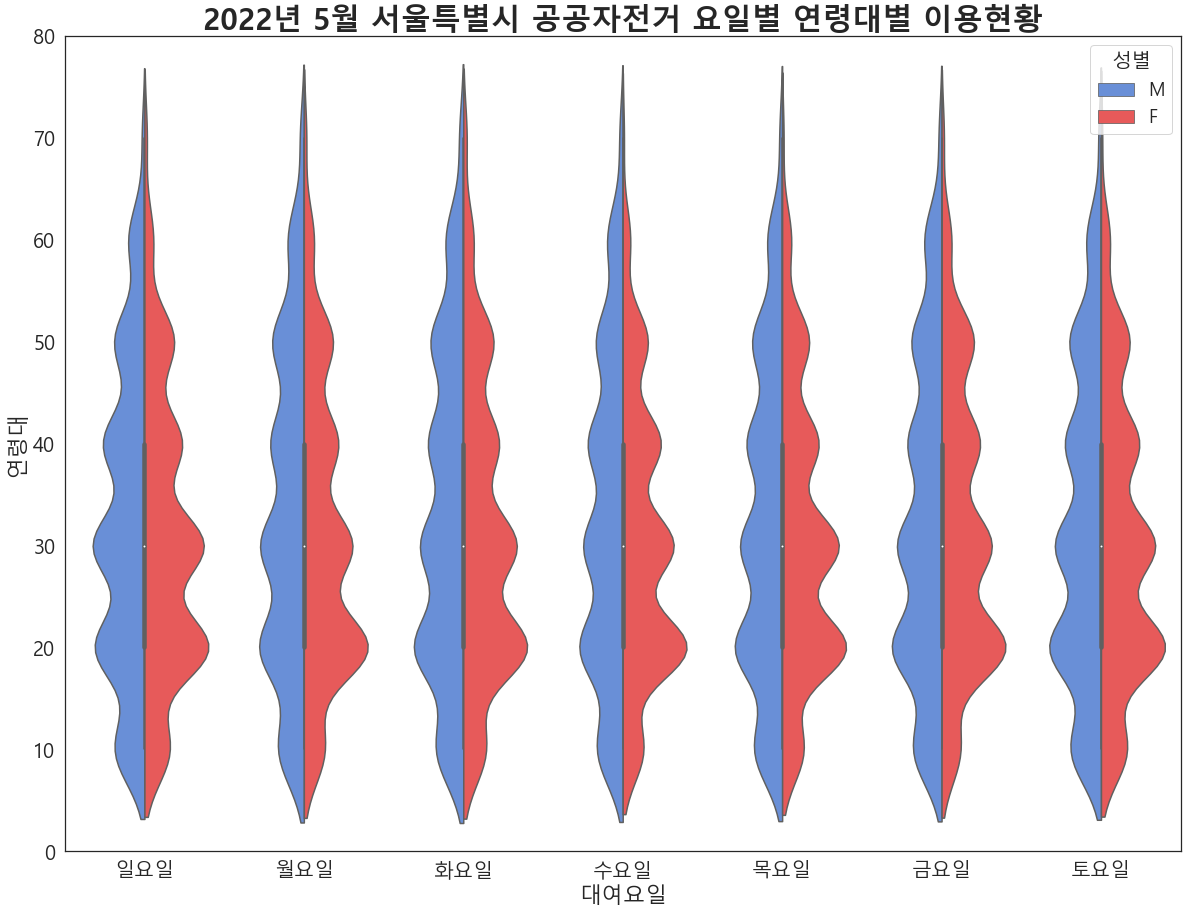

In [805]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False #마이너스 표시
plt.rc('font', size=20)

fig = plt.figure(figsize=(20, 15))

ax = sns.violinplot(x='대여요일', y='연령대코드', hue='성별', data=day, split=True, palette={'M': '#5689ea', 'F': '#ff4242'}, inner='box')
ax.set_ylim([0, 80])
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('대여요일', fontsize=22)
ax.set_ylabel('연령대', fontsize=22)

plt.legend(title='성별', fontsize=18, facecolor='w', title_fontsize='20')
plt.title('2022년 5월 서울특별시 공공자전거 요일별 연령대별 이용현황', fontweight='bold', fontsize=30)
plt.show()

<br>

# 실습 7
### 2016년~2021년 한국지역난방공사 여성임원 비율 비교
https://www.data.go.kr/data/15104977/fileData.do

#### 1. 라이브러리 import

In [738]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 2. csv 파일 불러오기

In [739]:
df = pd.read_csv('한국지역난방공사_여성임원비율_20211231.csv', encoding='CP949')
df

,연도(연말기준),전체임원 수,남성,여성,여성임원 비율
0,2016,11,10,1,9%
1,2017,11,10,1,9%
2,2018,11,8,3,27%
3,2019,11,8,3,27%
4,2020,11,8,3,27%
5,2021,11,10,1,9%


#### 3. 데이터 추출하기

In [740]:
df_prop = pd.DataFrame()
df_prop['연도'] = df['연도(연말기준)']
df_prop

,연도
0,2016
1,2017
2,2018
3,2019
4,2020
5,2021


In [741]:
# 남성임원 비율 구하기
df_prop['남성임원 비율'] = df['남성'] / df['전체임원 수']
df_prop

,연도,남성임원 비율
0,2016,0.909091
1,2017,0.909091
2,2018,0.727273
3,2019,0.727273
4,2020,0.727273
5,2021,0.909091


In [742]:
# 여성임원 비율 구하기
df_prop['여성임원 비율'] = df['여성'] / df['전체임원 수']
df_prop

,연도,남성임원 비율,여성임원 비율
0,2016,0.909091,0.090909
1,2017,0.909091,0.090909
2,2018,0.727273,0.272727
3,2019,0.727273,0.272727
4,2020,0.727273,0.272727
5,2021,0.909091,0.090909


In [743]:
df_prop = df_prop.set_index('연도')
df_prop

,남성임원 비율,여성임원 비율
연도,,
2016,0.909091,0.090909
2017,0.909091,0.090909
2018,0.727273,0.272727
2019,0.727273,0.272727
2020,0.727273,0.272727
2021,0.909091,0.090909


In [744]:
df = df.set_index('연도(연말기준)')
df

,전체임원 수,남성,여성,여성임원 비율
연도(연말기준),,,,
2016,11,10,1,9%
2017,11,10,1,9%
2018,11,8,3,27%
2019,11,8,3,27%
2020,11,8,3,27%
2021,11,10,1,9%


In [745]:
df_c = df[['남성', '여성']]
df_c

,남성,여성
연도(연말기준),,
2016,10,1
2017,10,1
2018,8,3
2019,8,3
2020,8,3
2021,10,1


#### 4. 그래프 그리기

<br>

C:\Users\djadp\AppData\Local\Temp\ipykernel_18740\3166195643.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator



<Figure size 1440x1080 with 0 Axes>

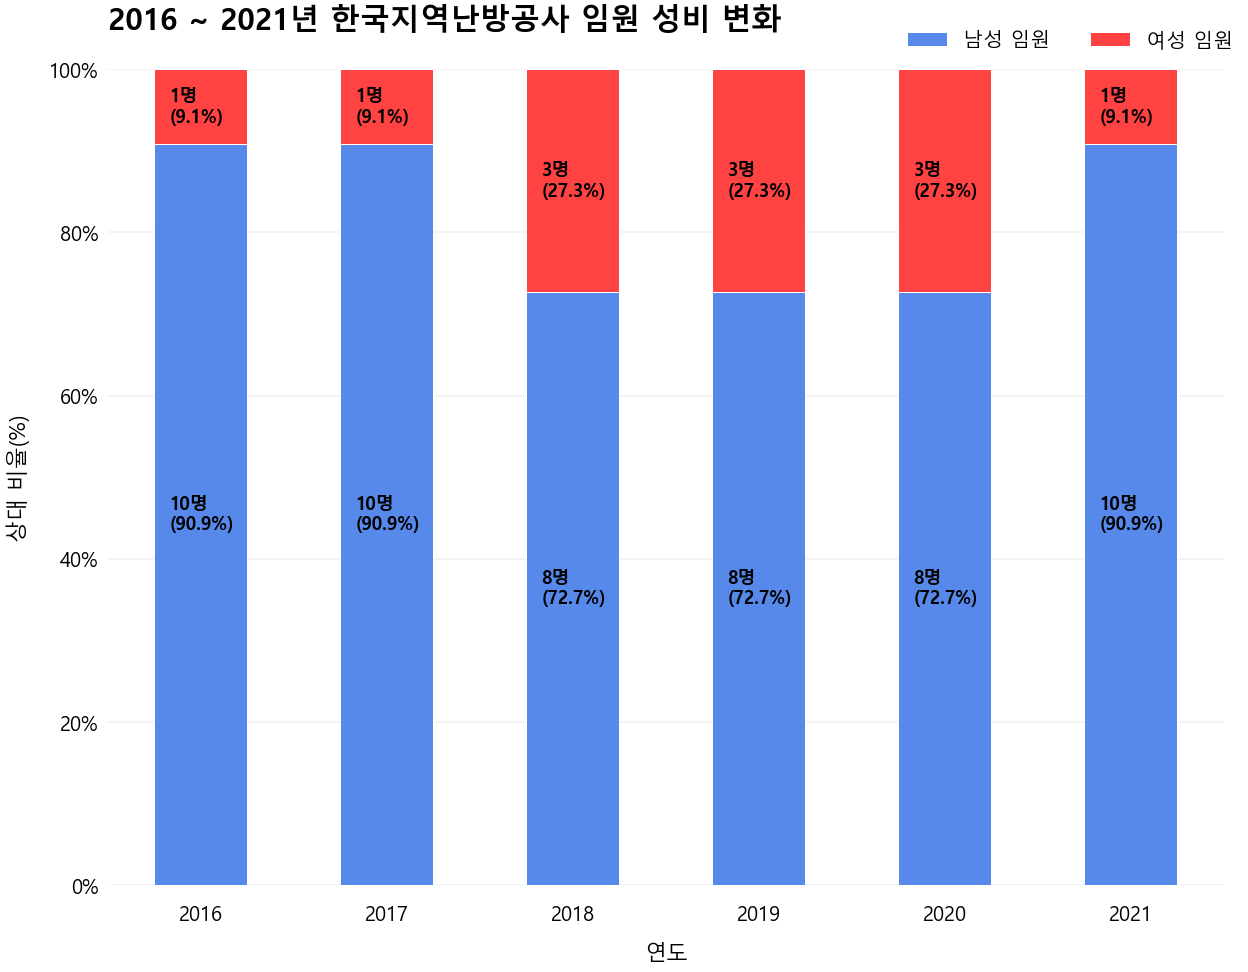

In [786]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False #마이너스 표시
plt.rc('font', size=20)

fig = plt.figure(figsize=(20, 15))

colors=['#5689ea', '#ff4242']
labels=['남성 임원', '여성 임원']

with plt.style.context(matplotx.styles.dufte_bar):
    ax = df_prop.plot(kind='bar', stacked=True, color=colors, figsize=(20, 15), legend=False)
    plt.ylim(0, 1.0)
    plt.xlabel('연도', fontsize=22, color='black')
    plt.ylabel('상대 비율(%)', fontsize=22, color='black')
    y_value=['{:,.0f}'.format(x * 100) + '%' for x in ax.get_yticks()]
    ax.set_yticklabels(y_value)
    plt.xticks(fontsize=20, rotation=-360, color='black')
    plt.yticks(fontsize=20, color='black')
    plt.title('2016 ~ 2021년 한국지역난방공사 임원 성비 변화', loc='left', fontsize=30, fontweight='bold', color='black')
    plt.legend(labels, bbox_to_anchor=([0.70, 1, 0, 0]), ncol=2, frameon=False, fontsize=20, labelcolor='black')

for n, x in enumerate([*df.index.values]):
    for (proportion, count, y_loc) in zip(df_prop.loc[x], df_c.loc[x], df_prop.loc[x].cumsum()):
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}명\n({np.round(proportion * 100, 1)}%)',
                 color='black',
                 fontsize=18,
                 fontweight='bold',
                 va='center')

plt.show()